In [2]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse

# --------------------------
# 1. Set Up the Environment
# --------------------------
sc.settings.verbosity = 0  # Reduce verbosity for clarity
sc.settings.set_figure_params(dpi=80, facecolor="white", frameon=False)




In [3]:
# 2. Load the Filtered Data
# --------------------------
# Load your filtered AnnData object (result from QC)
adata = sc.read("filtered_data.h5ad")
print("Filtered data:")
print(adata)



Filtered data:
AnnData object with n_obs × n_vars = 4053 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'


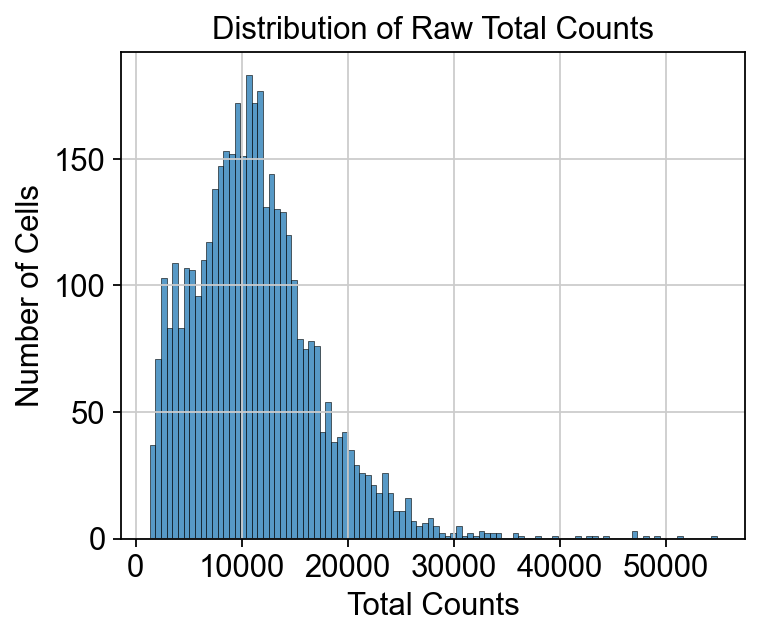

In [7]:
# Plot distribution of raw total counts (optional)
plt.figure(figsize=(5, 4))
sns.histplot(adata.obs["total_counts"], bins=100, kde=False)
plt.title("Distribution of Raw Total Counts")
plt.xlabel("Total Counts")
plt.ylabel("Number of Cells")
plt.show()


In [8]:
# --------------------------
# 3. Shifted Logarithm Normalization
# --------------------------
# Step 1: Scale counts per cell (without specifying target_sum uses the median total count by default)
scaled_results = sc.pp.normalize_total(adata, target_sum=None, inplace=False)

# Step 2: Apply log1p transformation to the scaled counts
# We store the result in a new layer "log1p_norm" so the original counts remain unchanged.
adata.layers["log1p_norm"] = sc.pp.log1p(scaled_results["X"], copy=True)


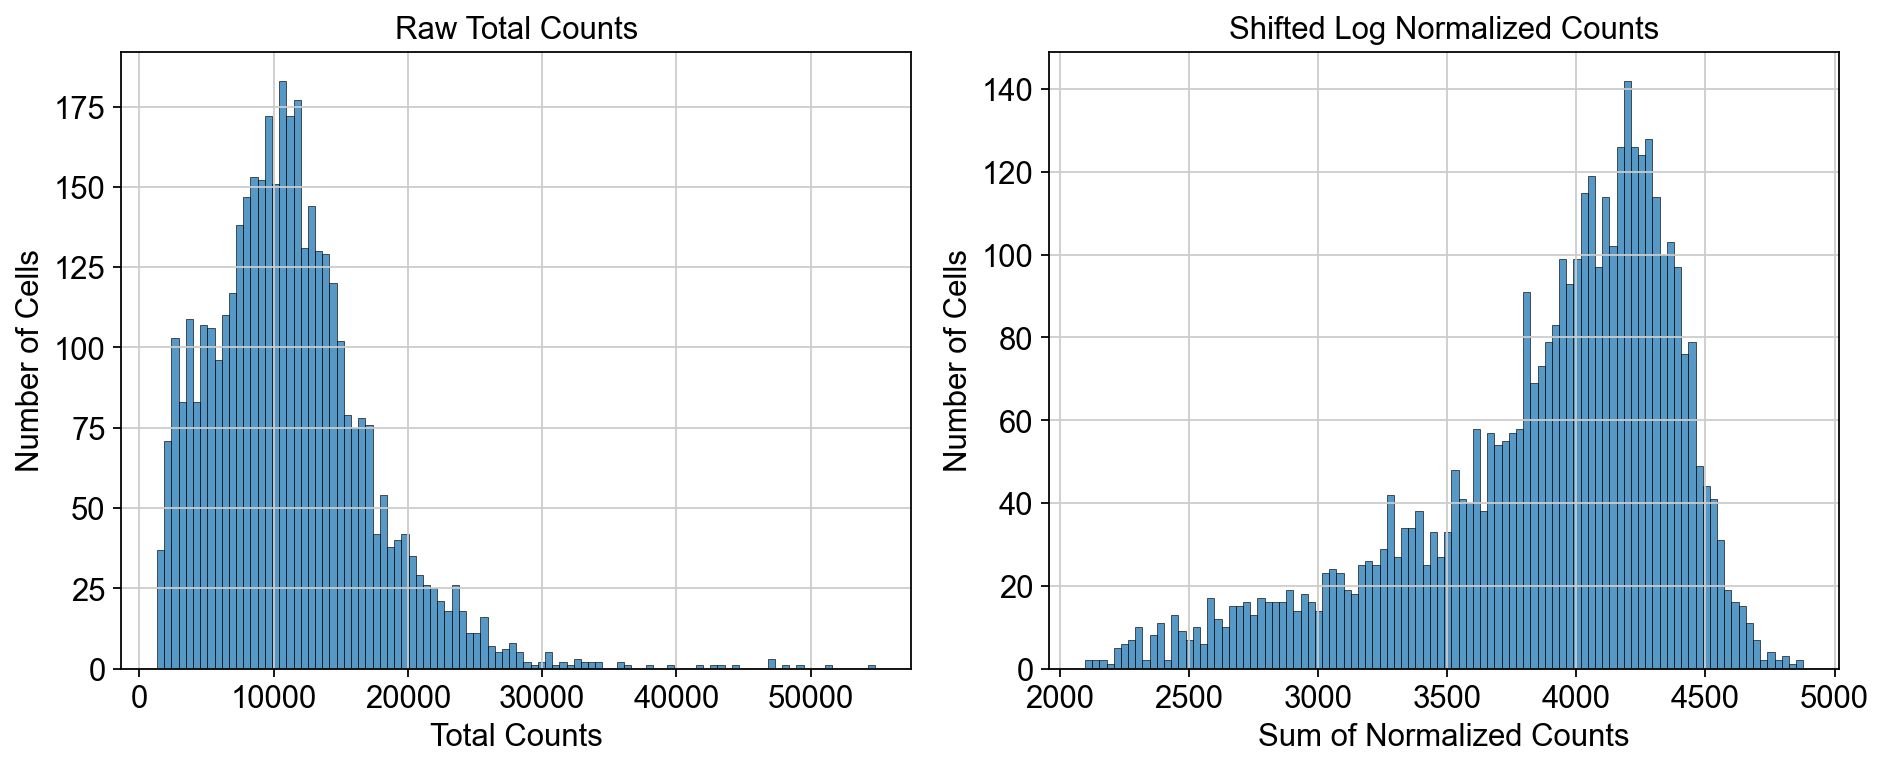

In [10]:
# --------------------------
# 4. Compare Before and After Normalization
# --------------------------
# Prepare a histogram comparing raw counts and the normalized counts per cell.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot raw total counts distribution
sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Raw Total Counts")
axes[0].set_xlabel("Total Counts")
axes[0].set_ylabel("Number of Cells")

# Plot distribution of per-cell sums after shifted log normalization.
# For sparse matrices, convert to an array.
if issparse(adata.layers["log1p_norm"]):
    norm_sum = adata.layers["log1p_norm"].sum(axis=1).A1
else:
    norm_sum = adata.layers["log1p_norm"].sum(axis=1)

sns.histplot(norm_sum, bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted Log Normalized Counts")
axes[1].set_xlabel("Sum of Normalized Counts")
axes[1].set_ylabel("Number of Cells")

plt.tight_layout()
plt.show()


In [11]:
# --------------------------
# 5. Save the Normalized Data (Optional)
# --------------------------
adata.write("s4d8_shifted_log_normalization.h5ad")
print("Shifted log normalization complete. Normalized data saved as 's4d8_shifted_log_normalization.h5ad'.")

Shifted log normalization complete. Normalized data saved as 's4d8_shifted_log_normalization.h5ad'.
